In [162]:
# importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sys
import random
%matplotlib inline


In [98]:
df=pd.read_excel(r'C:\Users\Elida Dominguez\Ia\env\Prueba\Prueba.xlsx')


In [97]:
print (df)

       Instalacion  Tarifa       Actividad Económica  Transformador Circuito  \
0         70093517     BTS               RESIDENCIAL        2030208     8-66   
1         70021978     BTS               RESIDENCIAL        1056330    TIN-3   
2         70081125     BTS               RESIDENCIAL        2017400     8-71   
3         70083319     BTS               RESIDENCIAL        2012915    3-112   
4         70083337     BTS               RESIDENCIAL        2012915    3-112   
...            ...     ...                       ...            ...      ...   
43562     70324627  BTS_CF  ANTENAS Y AMPLIFICADORES        2105520    3-104   
43563     70326521  BTS_CF  ANTENAS Y AMPLIFICADORES        1054900    TIN-3   
43564     70328127  BTS_CF  ANTENAS Y AMPLIFICADORES        1058175    TIN-1   
43565     70333220  BTS_CF  ANTENAS Y AMPLIFICADORES        2033400     8-67   
43566     70338699  BTS_CF  ANTENAS Y AMPLIFICADORES        2043825     8-63   

        Subestación  Fecha de Alta Clie

In [114]:
fuel = pd.read_excel(r'C:\Users\Elida Dominguez\Ia\env\Prueba\Prueba.xlsx')
print(fuel.shape)
fuel.head()

(43567, 19)


,Instalacion,Tarifa,Actividad Económica,Transformador,Circuito,Subestación,Fecha de Alta Cliente (YYYYMM),Marca,Modelo,Provincia,Corregimiento,Barrio,202101,202102,202103,202104,202105,202106,202107
0,70093517,BTS,RESIDENCIAL,2030208,8-66,Cerro Viento,201405,STAR INSTRUMENT,DDS26E - 2S,PANAMA,RUFINA ALFARO,BRISAS DEL GOLF,322.0,312.0,319.0,314.0,313.0,317.0,322.0
1,70021978,BTS,RESIDENCIAL,1056330,TIN-3,Tinajitas,201405,STAR INSTRUMENT,DDS26E - 2S,PANAMA,OMAR TORRIJOS,SANTA LIBRADA,260.0,297.0,242.0,0.0,411.0,242.0,207.0
2,70081125,BTS,RESIDENCIAL,2017400,8-71,Cerro Viento,201405,STAR INSTRUMENT,DDS26E - 2S,PANAMA,JOSE DOMINGO ESPINAR,EL PINACULO 1,182.0,207.0,222.0,190.0,203.0,199.0,212.0
3,70083319,BTS,RESIDENCIAL,2012915,3-112,Monte Oscuro,201405,STAR INSTRUMENT,DDS26E - 2S,PANAMA,JOSE DOMINGO ESPINAR,VILLA LUCRE,434.0,402.0,416.0,434.0,456.0,482.0,540.0
4,70083337,BTS,RESIDENCIAL,2012915,3-112,Monte Oscuro,201405,STAR INSTRUMENT,DDS26E - 2S,PANAMA,JOSE DOMINGO ESPINAR,VILLA LUCRE,356.0,323.0,344.0,390.0,422.0,442.0,421.0


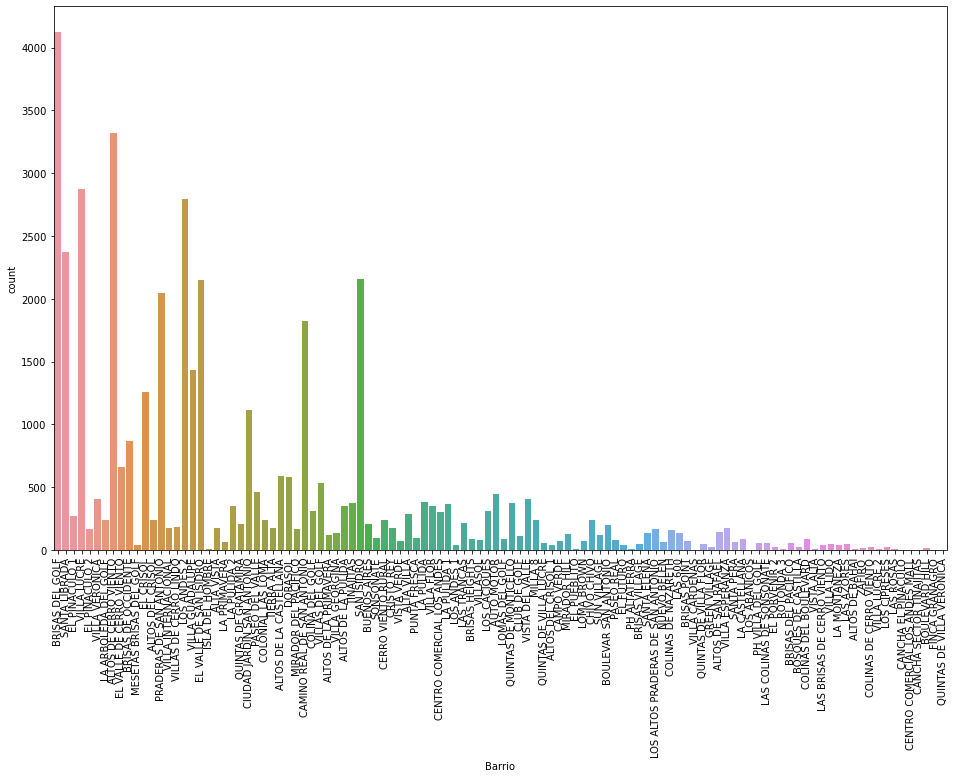

In [140]:
plt.figure(figsize=(16,10))
cplot = sb.countplot(data=fuel, x='Barrio')
plt.xticks(rotation=90)
plt.show()

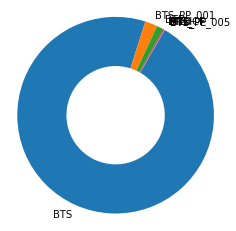

In [152]:
fuel = pd.read_excel(r'C:\Users\Elida Dominguez\Ia\env\Prueba\Prueba.xlsx')
fuel.head()

Tarifaf = fuel['Tarifa'].value_counts()
plt.pie(Tarifaf, labels=Tarifaf.index, startangle=60, counterclock=False, wedgeprops={'width':0.5})
plt.axis('square');


In [215]:
describe = fuel[['Instalacion', 'Transformador']]
print(describe.min())
print()
print(describe.max())

Instalacion      70000004
Transformador     1010202
dtype: int64

Instalacion      70651355
Transformador    82000021
dtype: int64


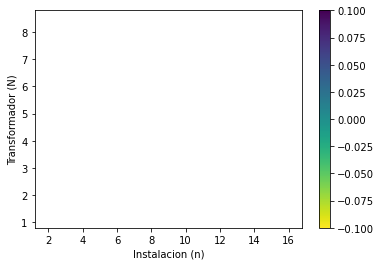

In [217]:
# hist2d también es una funcion, esta retorna diferentes valores, p.e. la cantidad de cuenta de puntos
binx=np.arange(1.2, 16+1.5, 1.2)
biny=np.arange(0.8, 8+1.5, 0.8)
hgm = plt.hist2d(data=fuel, x='Instalacion', y='Transformador', cmin=0.5, cmap='viridis_r', bins=[binx,biny]) 
plt.colorbar()
plt.xlabel('Instalacion (n)')
plt.ylabel('Transformador (N)');
cnts = hgm[0]
# Vamos a poner estos números sobre el mapa de calor
for i in range(cnts.shape[0]):
    for j in range(cnts.shape[1]):
        c = cnts[i,j]
        if c >= 7: # aumenta la visibilidad de celdas oscuras
            plt.text(binx[i]+.6, biny[j]+0.4, int(c), ha='center', va='center', color='white')
        elif c > 0:
            plt.text(binx[i]+.6, biny[j]+0.4, int(c), ha='center', va='center', color='black')

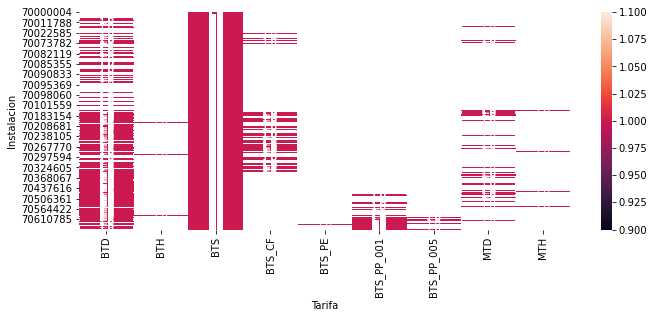

In [220]:
fuelcp = fuel[['Instalacion', 'Tarifa']].copy()
fuelcp.head(1)

fuelcnts = fuelcp.groupby(['Instalacion', 'Tarifa']).size()
fuelcnts.head()

fuelcnts = fuelcnts.reset_index(name='count')
fuelcnts.head()

fuelcnts = fuelcnts.pivot(index='Instalacion', columns='Tarifa', values='count')
fuelcnts.head()

plt.figure(figsize=[11,4])
sb.heatmap(fuelcnts, annot=True, fmt='.1f');